# Task 3: Predictive Analytics

## K Nearest Neighbour

### Imports:

In [78]:
import pandas as pd
import numpy as np
import re
import datetime as dt #for working with times objects

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import warnings
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

#### Reading in the feature_set:

In [79]:
feature_set = pd.read_pickle("feature_set.pkl")
feature_set

,max_temp,precip,amount,day_of_week,hour_of_the_day,month
hour_from_zero,,,,,,
1,15.6,0,19,1,1,1
2,15.0,0,8,1,2,1
3,15.0,0,16,1,3,1
4,13.9,0,2,1,4,1
5,12.2,0,0,1,5,1
...,...,...,...,...,...,...
8755,20.0,0,46,1,19,12
8756,20.6,0,37,1,20,12
8757,21.1,0,41,1,21,12


### Splitting it into training and test set:

In [80]:
# split the data with 70-30% split as above
x_train, x_test, y_train, y_test = train_test_split(feature_set.drop(columns = ["amount"]), feature_set["amount"], test_size=0.3,random_state=42)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


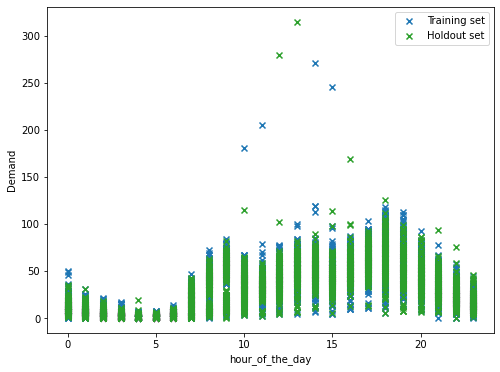

In [81]:
plt.figure(figsize = (8,6))
plt.scatter(x_train['hour_of_the_day'], y_train, marker='x', color="C0")
plt.scatter(x_test['hour_of_the_day'], y_test, marker='x', color="C2")
plt.xlabel("hour_of_the_day")
plt.ylabel("Demand")
plt.legend(['Training set', 'Holdout set'])
plt.show()

In [82]:
# plt.figure(figsize = (8,6))

# sns.scatterplot(x=feature_set["hour_of_the_day"], y=feature_set["amount"], 
#                 hue=(feature_set["max_temp"].apply(lambda x: 1 if x>17 else 0)))

# plt.show()

### Comparison between a single and a double Dimemsional KNN regression:

In [83]:
X = feature_set["hour_of_the_day"].values.reshape(-1, 1)
y = feature_set["amount"]
KNN_1_1d = KNeighborsRegressor(n_neighbors=9)
KNN_model_1_1d = KNN_1_1d.fit(X,y)


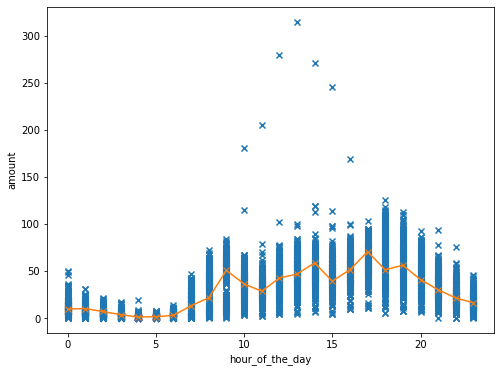

In [84]:
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker="x")
plt.plot(np.arange(0,24,1),KNN_model_1_1d.predict(np.arange(0,24,1).reshape(-1,1)), marker="x", color='C1')
plt.xlabel("hour_of_the_day")
plt.ylabel("amount")
plt.show()

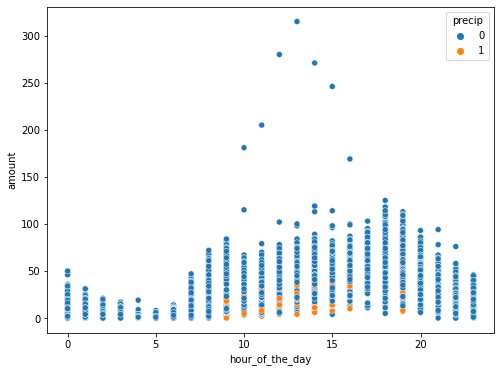

In [85]:
plt.figure(figsize = (8,6))

sns.scatterplot(x=feature_set["hour_of_the_day"], y=feature_set["amount"], 
                hue=feature_set["precip"])
# hue = precip
plt.show()

In [86]:
X = feature_set[["hour_of_the_day", "precip"]]
y = feature_set["amount"]
KNN_1_2d = KNeighborsRegressor(n_neighbors=9)
KNN_model_1_2d = KNN_1_2d.fit(X,y)


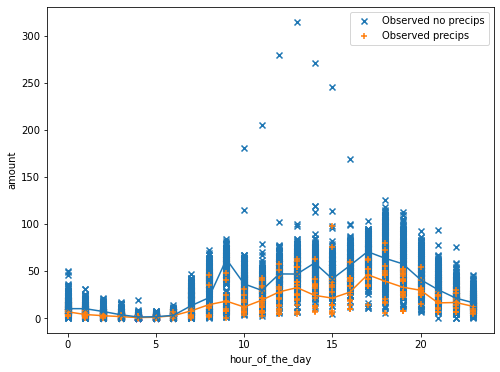

In [87]:
X_no_precip = X[X["precip"]==0]
X_precip = X[X["precip"]==1]


# predict precip and no_precip seperately
y_pred_no_precip = KNN_model_1_2d.predict(X_no_precip)
y_pred_precip = KNN_model_1_2d.predict(X_precip)

plt.figure(figsize = (8,6))


plt.scatter(X_no_precip["hour_of_the_day"], 
            feature_set[feature_set["precip"]==False]["amount"], 
            marker="x", label="Observed no precips")
plt.scatter(X_precip["hour_of_the_day"], 
            feature_set[feature_set["precip"]==True]["amount"], 
            marker="+", label="Observed precips")

#Xnew = np.array([[30,0,3,20,6]]) #predict peak demand at 30deg c, no rain, thursday, 8p.m., june

zero_to_24_precip = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
                              ,[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]).T
zero_to_24_no_precip = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
                                 ,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]).T

                              
plt.plot(np.arange(0,24,1), KNN_model_1_2d.predict(zero_to_24_precip), marker="+", color='C1')
plt.plot(np.arange(0,24,1), KNN_model_1_2d.predict(zero_to_24_no_precip), marker="x", color='C0')


plt.xlabel("hour_of_the_day")
plt.ylabel("amount")

plt.legend()
plt.show()

In [88]:
y_true = feature_set["amount"]
#features
X_1d = feature_set["hour_of_the_day"].values.reshape((-1,1)) # need to reshape 1d vector
X_2d = feature_set[["hour_of_the_day","precip"]]

# make predictions (models have already been fitted above!)
y_pred_1d = KNN_model_1_1d.predict(X_1d)
y_pred_2d = KNN_model_1_2d.predict(X_2d)

# report test metrics

print("MAE 1D:", mean_absolute_error(y_true,y_pred_1d))
print("MAE 2D:", mean_absolute_error(y_true,y_pred_2d))

print("RMSE 1D:", mean_squared_error(y_true,y_pred_1d)**0.5)
print("RMSE 2D:", mean_squared_error(y_true,y_pred_2d)**0.5)

print("R2 1D:", r2_score(y_true,y_pred_1d))
print("R2 2D:", r2_score(y_true,y_pred_2d))

MAE 1D: 10.50686570203235
MAE 2D: 10.272744626426908
RMSE 1D: 15.846406126056111
RMSE 2D: 15.626089015387144
R2 1D: 0.6115131598110297
R2 2D: 0.6222405517894658


### Regression:

#### Starting with finding the right k for our feature_set:

In [99]:
def find_knn_R2 (max_k):
    
    err_train = [] 
    err_test = []
    
  #  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(x_train, y_train)


        # compute errors
        err_train.append(r2_score(KNN_model.predict(x_train), y_train))
        err_test.append(r2_score(KNN_model.predict(x_test), y_test))
        
        
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("R2")
    #plt.ylim((0,1))
    plt.show()

    
    
def find_knn_MAE (max_k):
    
    err_train = [] 
    err_test = []
    
  #  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(x_train, y_train)


        # compute errors
        err_train.append(mean_absolute_error(KNN_model.predict(x_train), y_train))
        err_test.append(mean_absolute_error(KNN_model.predict(x_test), y_test))
        
        
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("MAE")
    #plt.ylim((0,1))
    plt.show()

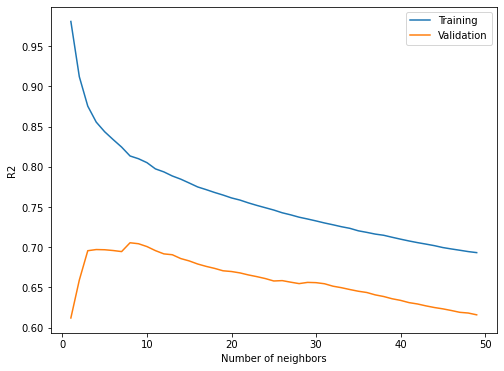

In [100]:
find_knn_R2 (max_k=50)

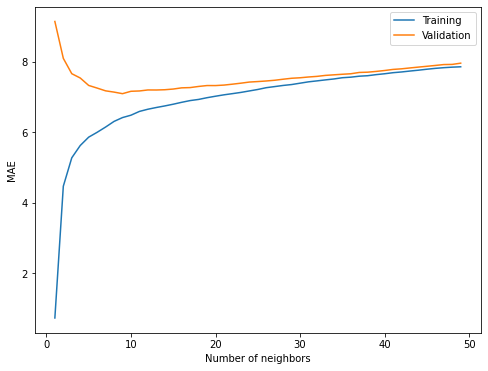

In [101]:
find_knn_MAE (max_k=50)

#### Creating a regression model with the right k=9 (see above):

In [102]:
#Fit model
KNN_reg = KNeighborsRegressor(n_neighbors=9)
KNN_model = KNN_reg.fit(x_train, y_train) 

# Predict
y_hat_KNN = KNN_model.predict(x_test)

#### Printing the perfomance indices of the regression:

In [120]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "Bike rentings")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "Bike rentings")  
print("R2:",r2_score(y_hat_KNN, y_test))

Test set performance:
MAE: 7.091391009329941 Bike rentings
RMSE: 12.119204795299792 Bike rentings
R2: 0.7043499329863271


#### Overview of the features:

In [121]:
x_train.info() #show all features for the prediction

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6111 entries, 1601 to 7298
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   max_temp         6111 non-null   float64
 1   precip           6111 non-null   int32  
 2   day_of_week      6111 non-null   int64  
 3   hour_of_the_day  6111 non-null   int64  
 4   month            6111 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 262.6 KB


#### Time for some predictions:

In [137]:
# temp,precip,day of week, hour of the day, month

Xnew = np.array([[28,0,4,20,7]]) #predict peak demand at 28deg c, no rain, frieday, 8p.m., july
print("Exact prediction:", KNN_model.predict(Xnew)[0][0])
print("We probably should supply a minimum of",np.int_(KNN_model.predict(Xnew))[0][0]+1, "Bikes, for our inserted parameters.")

Exact prediction: 70.44444444444444
We probably should supply a minimum of 71 Bikes, for our inserted parameters.


In [110]:
Xnew = np.array([[15,0,4,20,1]]) #predict peak demand at 15deg c, no rain, frieday, 8p.m., january
print("Exact prediction:", KNN_model.predict(Xnew)[0][0])
print("We probably should supply a minimum of",np.int_(KNN_model.predict(Xnew))[0][0]+1, "Bikes, for our inserted parameters.")

[[30.22222222]]


In [111]:
Xnew = np.array([[20,0,0,8,6]]) #predict peak demand at 20deg c, no rain, monday, 8a.m., june
print("Exact prediction:", KNN_model.predict(Xnew)[0][0])
print("We probably should supply a minimum of",np.int_(KNN_model.predict(Xnew))[0][0]+1, "Bikes, for our inserted parameters.")

[[41.55555556]]


In [115]:
Xnew = np.array([[10,1,1,8,4]]) #predict peak demand at 100deg c, rain, thursday, 8a.m., april
print("Exact prediction:", KNN_model.predict(Xnew)[0][0])
print("We probably should supply a minimum of",np.int_(KNN_model.predict(Xnew))[0][0]+1, "Bikes, for our inserted parameters.")

[[34.66666667]]
